In [17]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.signal import find_peaks
import numpy as np
import datetime
from scipy import stats
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [20, 10]
import warnings
warnings.filterwarnings('ignore')
finresa = pd.read_csv('./input/finresoct.csv')
totfisha = len(finresa)
finres=finresa[finresa['info']!='error']
totfish = len(finres)


In [18]:
sns.set_context("paper")

# Data schedule 
We have gathered data at multiple times in slightly bit different conditions.

| fishtype     | flow      | info |
|--------------|-----------|------------|
| farmed_in | old | In 2019 we had a group of fish from indoor facility which we have watched smolt at SCENE and observed their reaction to flow. This is alredy described in last years SSE report. Recordings were done in a lit room with 20minute acclimatisation and flow direction has been changed remotely by turning of one pump and turning on another (hence, there was a little bit of a difference in pumps power. |
| farmed_loch | low | In 2021 we got some lovely fish that was on a natural light cycle in a loch. We got it to the point of smolting and started performing experiments. The preliminary experiments shows that fish is very unstable and we decided to perform experiments in darkness. At this point the old pump died (due to lack of maintenance ) and there was a bi-directional pump fitted with variable power settings. It is fair to say that flow in both directions is comparable but because the experimental area is much closer to the pump from one direction there will be a difference in how quickly flow changes and in which parts.
| farmed_loch | high | After running experiment for some time and analysing data so far I realised that too often than not fish holds in the wrong direction, or doesn't react to flow. Hence we decided to increase the flow speed.  However after I took 
| wild | high | Hard to describe how lucky we were to run our experiment on wild smolts

As the condition that fish needs to adjust are different depending on the direciton of flow, we distinguish two direction of flow

Additional data:



| no ind | fish tested | weight | FL | water temp | time |
|--------------|--------------|-----------|------------|------------|------------|
| 58 | farmed_loch | 44 | 16 | | | March 2021 |
| 31 | wild | 24 |13 | | | May 2021 |
| 52 | farmed_in | 117 | 20 | 18.4 | August 2019 |


In [88]:
58+52+31

141

In [89]:
finres['fishtype'].value_counts()




farmed_loch    58
farmed_in      45
wild           31
Name: fishtype, dtype: int64

In [2]:
print(finres['fsdir'].value_counts())

high_clock      33
high_counter    30
old_clock       25
old_counter     20
low_clock       13
low_counter     13
Name: fsdir, dtype: int64


In [15]:
#Checking if our flow measurements in Autumn are matching ones done with the old pump in Spring. 
# The statistical test in statistical_tests.ipynb notebook in R
# The test shows that the difference is not statistically different than 0. 
# It is a weak "evidence" and if we have to we can try to do error analysis to quantify our uncertanties but it might be quite a lot of work.
flowtune = pd.read_csv('./input/flowtune.csv')
sns.histplot(data=flowtune, x='diff',binwidth=1,kde=True)
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: './input/flowtune.csv'

# Possible fish responses

We define number of **exclusionary** reactions

| reaction     | description |
|--------------|-----------|
| dir_change | If within 5 minutes the fish changed holding direction (__success__) |
| swim_off  | If fish swam off *without* changing holding position first (dk) |
| no_reaction | If fish didn't change holding position or was alreayd holding in the "wrong direction" before flow changed  (failure)| 
| unstable | If fish kept moving throughout (dk) |
| error | Experimental error, removing sample from analysis (exclude) |

We exclude or records with `error`. The only success is change of direction `dir_change`, failure is `no_reaction` and other two (`ustable` and `swim_off`) are unknown (`dk`=don't know). Variable `success` describes that and is modelled in R notebook

# Research questions
    1. What is the behaviour response of salmon smolts to switching current?
    2. Does the response differ between fish types and flow conditions?
       NO
    3. Does fish type or flow conditions affect the flow rate at which fish respond. And flow rate is A Absolute, B fraction of prev stable, C fraction of mean, time of change?

We address eacho of those questions using statistical tests in R notebook

# Sample size and reactions of the fish

We have tested on 141 fish
After excluding experimental error we have a total of N=134 data points


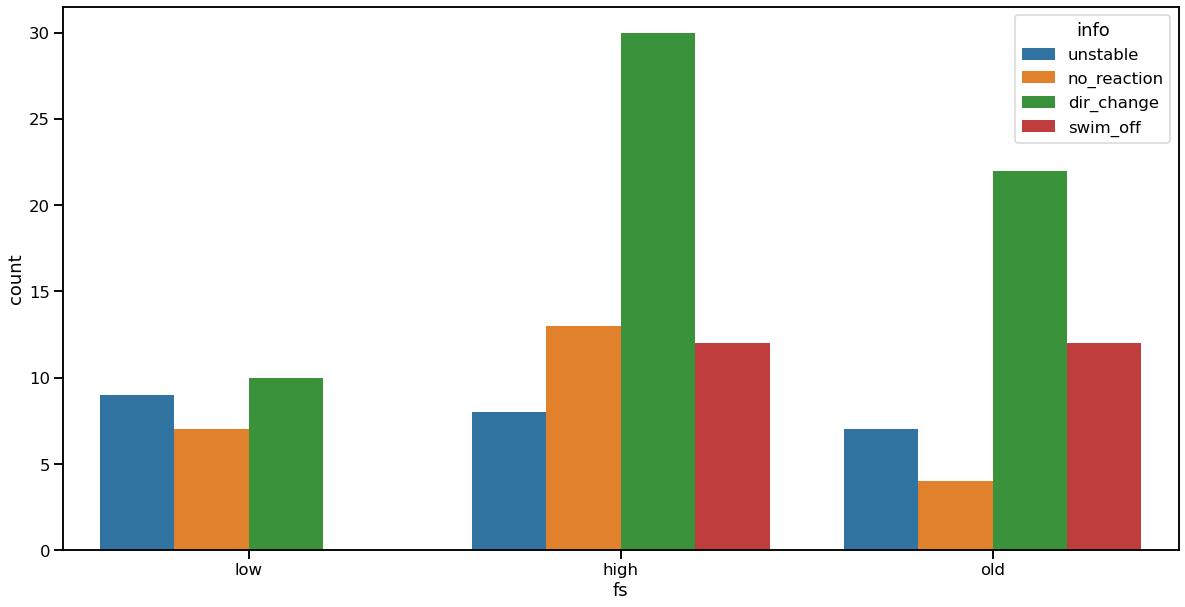

dir_change     62
no_reaction    24
swim_off       24
unstable       24
Name: info, dtype: int64
dir_change     0.462687
no_reaction    0.179104
swim_off       0.179104
unstable       0.179104
Name: info, dtype: float64


'\n in 2021, we got farmed in the loch and they were very unstable in prelim tests, not settling. \n We reduced a flow to the minimal (with 5 grids (max)) and did experiments in the nightime.\n It seemed then that we had quite a lot of no-reactions (compared to previous year) so we tried higher flow,\n risking more instability\n High is about 20% faster\n'

In [20]:
print(f'We have tested on {totfisha} fish')
print(f'After excluding experimental error we have a total of N={totfish} data points')

"""
From farmed indoor in 2019 we didn't have enough data points.
Two pumps in different direction with different flow 
fish in light, as pumps were remotely controlled, 
we were able to take a 10s average at the *precise point* where fish reacted
"""
sns.set_context("talk")
sns.countplot(data=finres, x='fs', hue = 'info' )
plt.show()
print(finres['info'].value_counts())
print(finres['info'].value_counts(normalize=True))#check what happened to highold
"""
 in 2021, we got farmed in the loch and they were very unstable in prelim tests, not settling. 
 We reduced a flow to the minimal (with 5 grids (max)) and did experiments in the nightime.
 It seemed then that we had quite a lot of no-reactions (compared to previous year) so we tried higher flow,
 risking more instability
 High is about 20% faster
"""



In [21]:
finres.sample(10)

,fishname,fs,fishdate,time_flow,time_react,tdiff,info,info_other,direction,stable10prev,...,asfractprev10,tsec,abs1,abs5,abs10,fsdir,success,absstable10,absstable10_v,fdistcm
139,wild27,high,05/05/2021,13:05:54,13:07:01,00:01:07,dir_change,dir change,counter,19.6,...,-0.658163,67.0,13.8,13.8,12.9,high_counter,yes,19.6,2.547330,1.251384
125,wild7,high,03/05/2021,16:02:00,16:02:37,00:00:37,dir_change,changes direction but is first sideways accros...,clock,18.0,...,-0.400000,37.0,7.0,7.0,7.2,high_clock,yes,18.0,2.494438,0.860307
93,fish63,low,13Mar,17:36:25,17:36:55,00:00:30,dir_change,NaN,clock,15.7,...,0.031847,30.0,0.2,0.2,0.5,low_clock,yes,15.7,5.538752,4.032894
40,indoorfarmed4,old,1Aug,15:46:30,15:46:47,00:00:17,swim_off,NaN,clock,11.0,...,-0.363636,17.0,NaN,NaN,4.0,old_clock,dk,11.0,NaN,NaN
114,farmed102,high,28/03/2021,15:09:09,15:10:33,00:01:24,swim_off,swim off,counter,17.7,...,-1.180791,84.0,21.0,21.0,20.9,high_counter,dk,17.7,2.263233,5.382643
110,farmed98,high,28/03/2021,13:18:24,13:19:36,00:01:12,swim_off,swim off,counter,9.1,...,-1.450549,72.0,12.6,12.6,13.2,high_counter,dk,9.1,2.233582,4.778395
97,fish80,low,25/03/2021,17:10:25,17:11:04,00:00:39,dir_change,stable,counter,15.7,...,-0.312102,39.0,5.6,5.6,4.9,low_counter,yes,15.7,5.538752,11.290205
58,indoorfarmed22,old,6Aug,11:18:51,11:20:06,00:01:15,swim_off,NaN,counter,-15.0,...,-0.400000,75.0,NaN,NaN,6.0,old_counter,dk,15.0,NaN,NaN
119,farmed112,high,28/03/2021,19:44:04,19:44:35,00:00:31,dir_change,dir change,counter,19.1,...,-0.083770,31.0,2.8,2.8,1.6,high_counter,yes,19.1,2.024846,2.313184
128,wild11,high,03/05/2021,17:54:12,17:54:44,00:00:32,dir_change,changes direction but is first sideways accros...,clock,16.2,...,-0.308642,32.0,4.8,4.8,5.0,high_clock,yes,16.2,1.316561,9.897054


# Exploration

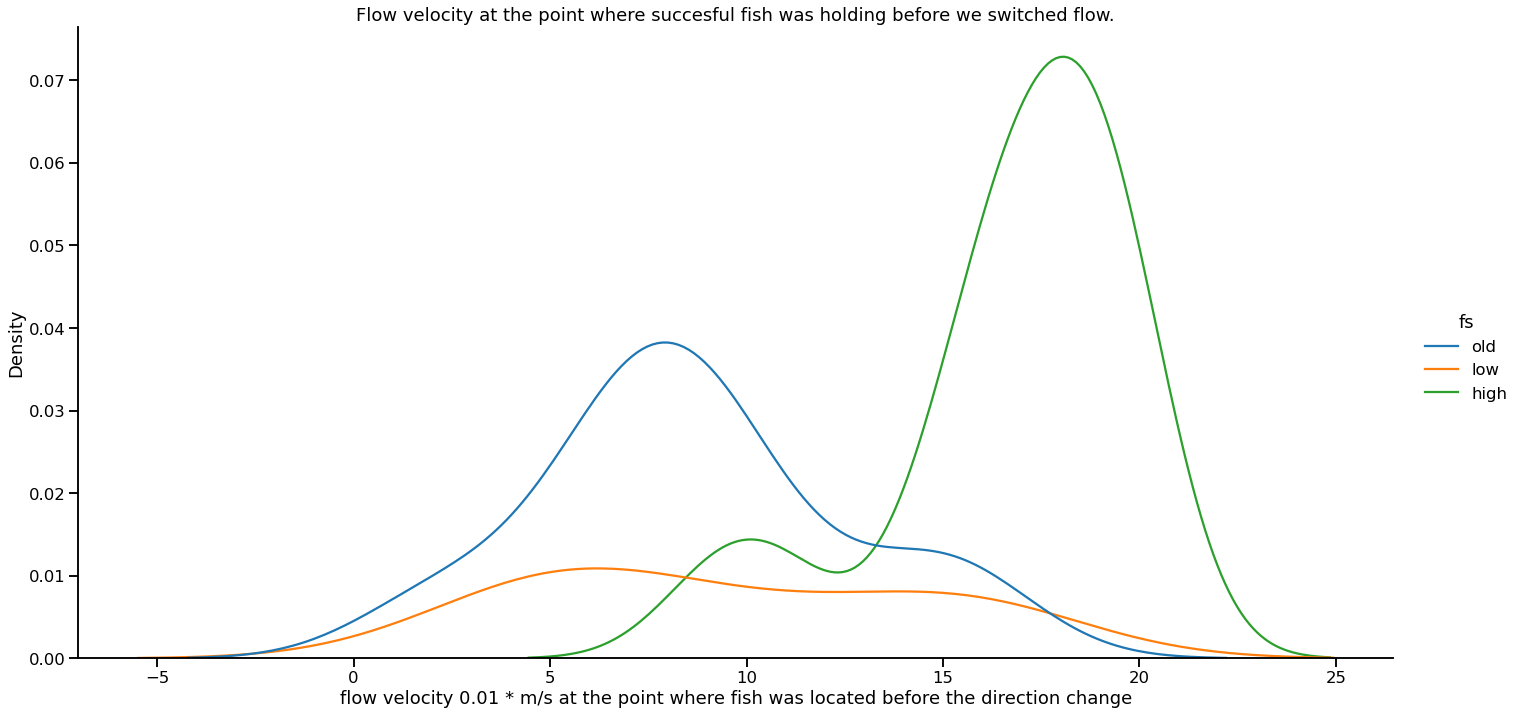

In [22]:
finsuc = finres[finres['success']=='yes']
#sns.displot(kind="hist", data=finres, x='absstable10', hue = 'fsdir' ,binwidth=1,kde=True)
#sns.displot(kind="kde", data=finres, x='absstable10', col='fishtype', hue = 'fsdir',height=10, aspect=2,)
sns.displot(kind="kde", data=finsuc, x='absstable10', hue = 'fs',height=10, aspect=2,)
plt.xlabel('flow velocity 0.01 * m/s at the point where fish was located before the direction change')
plt.title('Flow velocity at the point where succesful fish was holding before we switched flow.')
plt.show()


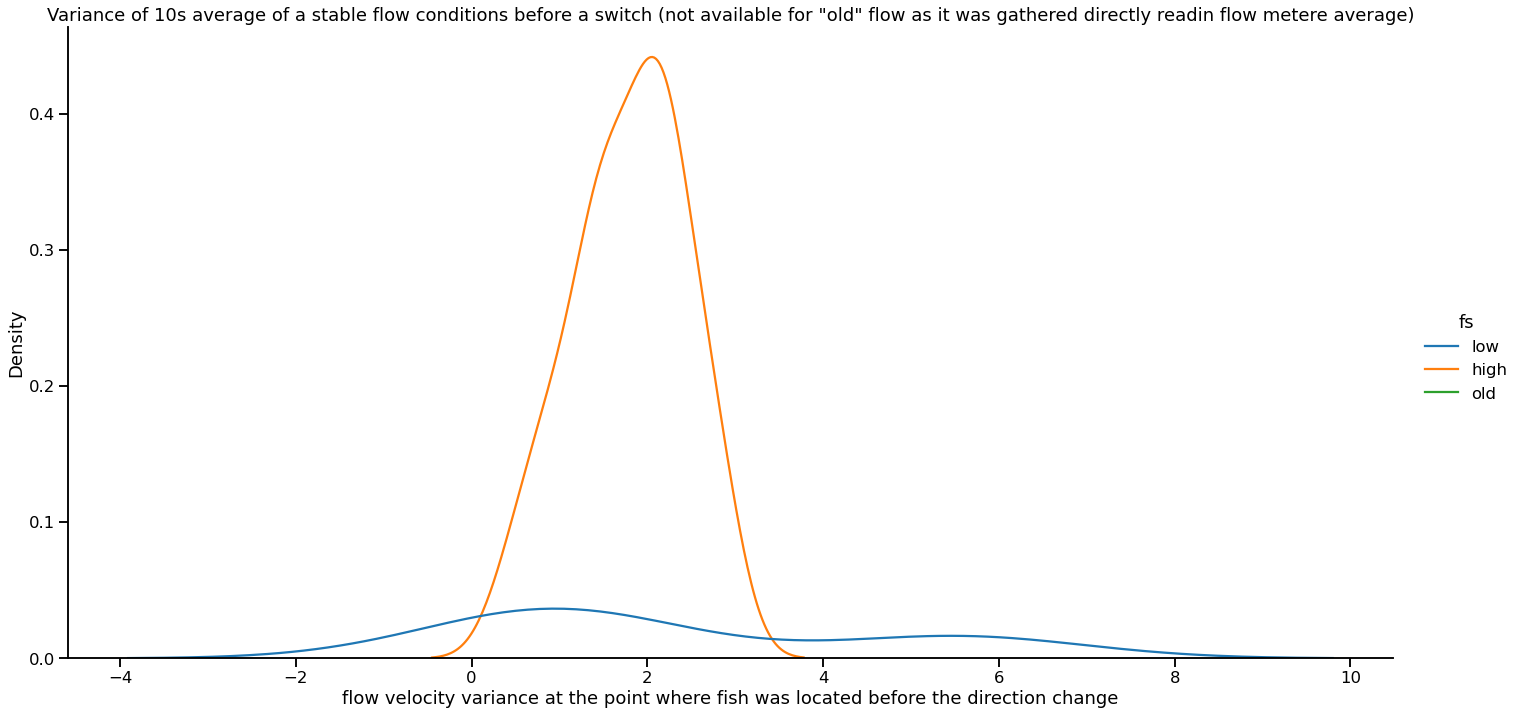

In [23]:
# variance of stable flow
sns.displot(kind="kde", data=finres, x='absstable10_v', hue = 'fs',height=10, aspect=2,)
plt.xlabel('flow velocity variance at the point where fish was located before the direction change')
plt.title('Variance of 10s average of a stable flow conditions before a switch (not available for "old" flow as it was gathered directly readin flow metere average)')

plt.show()


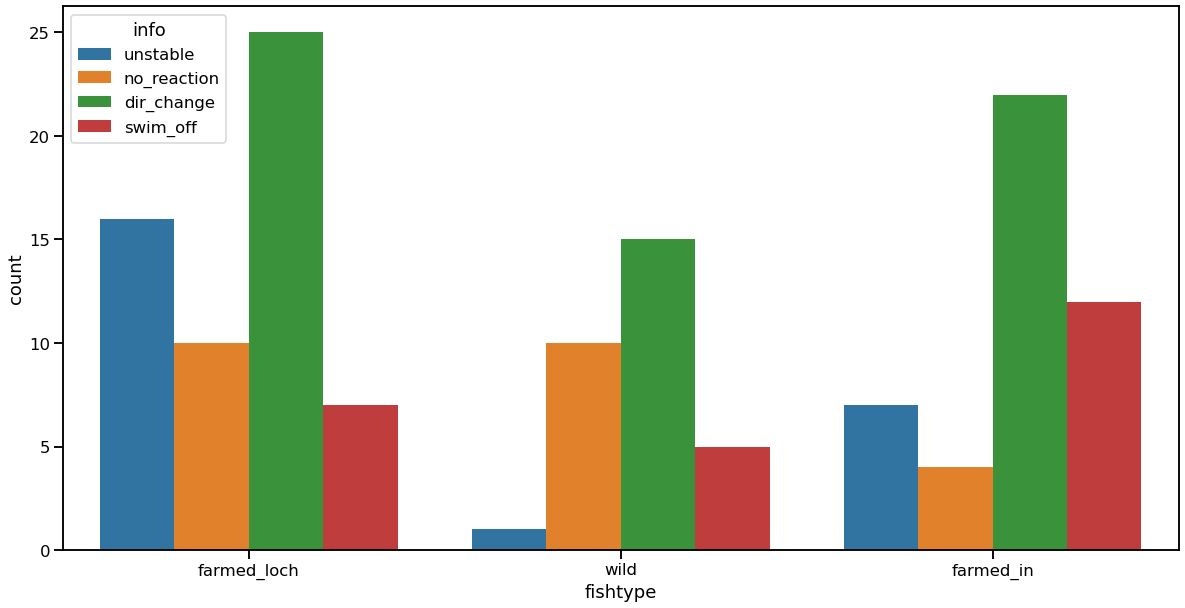

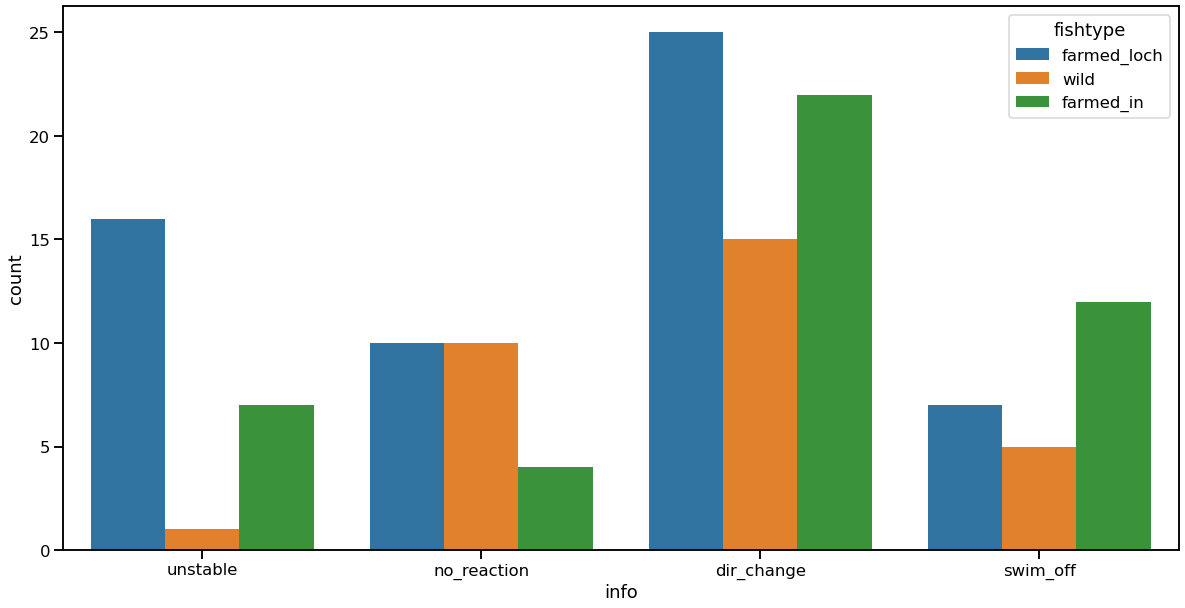

In [25]:
#Reaction of different fish
sns.countplot(data=finres, x='fishtype', hue = 'info')
plt.show()
sns.countplot(data=finres, x='info', hue = 'fishtype')
plt.show()


AttributeError: 'Line2D' object has no property 'kde_kws'

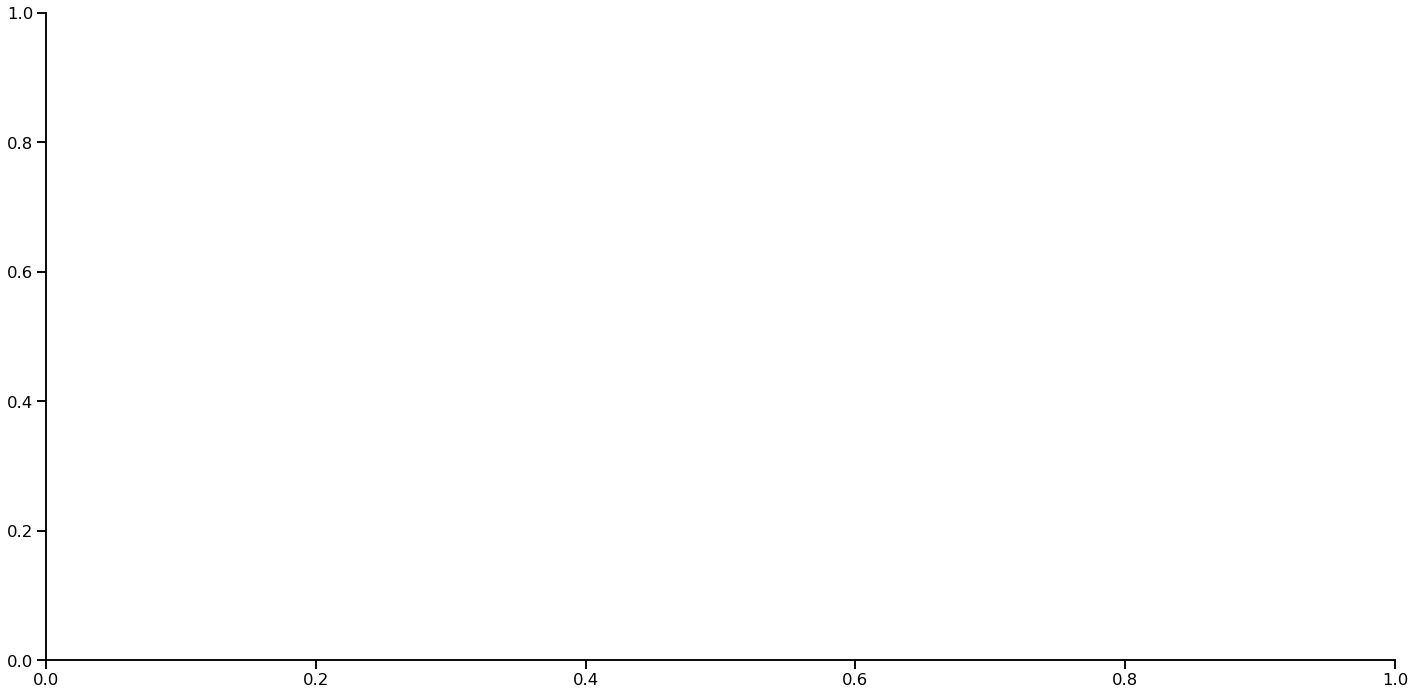

In [44]:
#Because we had a pump switch mechanical in different room there is a change in how we gather flow data.
# I measured flow change in time in many points (or not so many) in the flume. 
sns.displot(kind="kde", data=finres, x='fdistcm', hue = 'fs',height=10, aspect=2,kde_kws=dict(linewidth=5))
plt.title('Average distance in centimeters between a fish reaction position and the flow measurement point')

plt.show()


AttributeError: 'Line2D' object has no property 'elemnt'

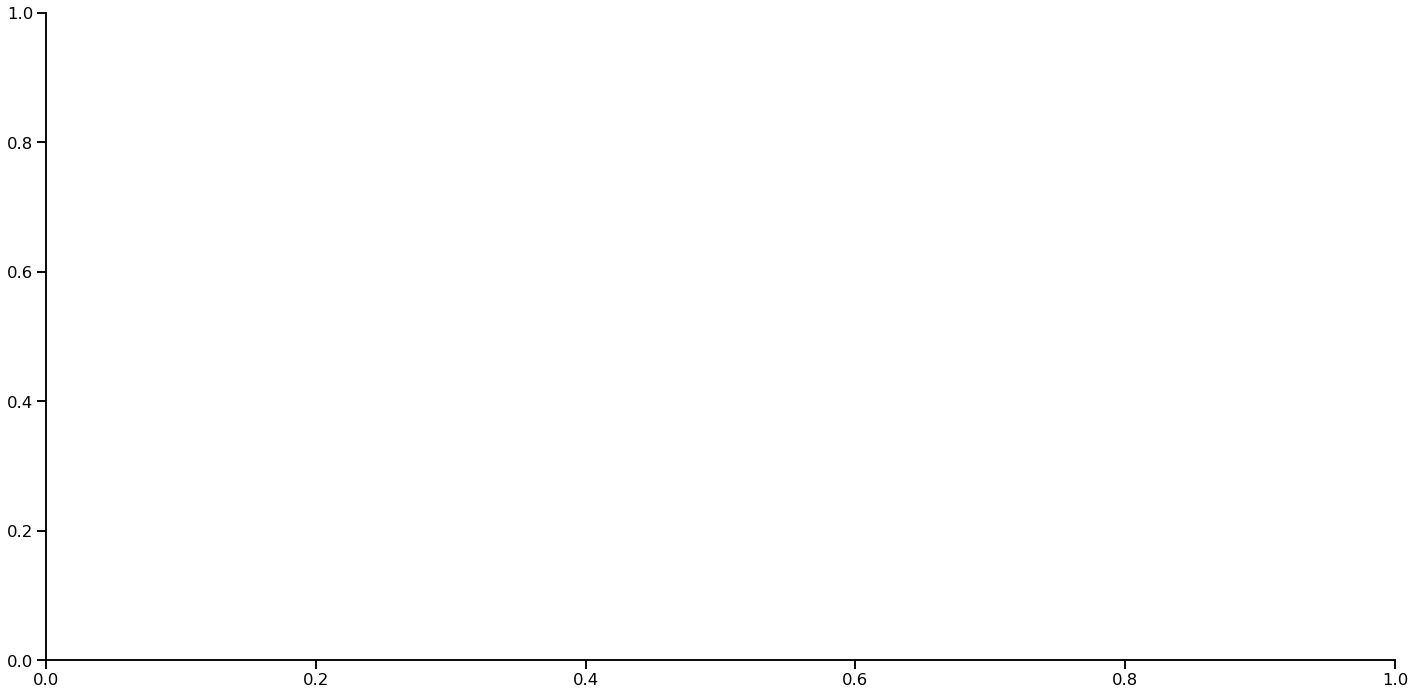

In [53]:
#sns.histplot(data=finres, x='tsec', hue = 'fsdir',binwidth=10,kde=True)

sns.displot(kind="kde", data=finsuc, x='tsec', hue = 'fs',height=10, aspect=2, elemnt='fill')
#sns.displot(kind="kde", data=finres, x='tsec', hue = 'fsdir',height=10, aspect=2,)
plt.title('Time needed for fish reaction with 5 min cutoff')
plt.xlabel('REaction time in seconds')

plt.show()
sns.displot(kind="kde", data=finres, x='abs10', hue = 'fishtype', height=10, aspect=2,)
plt.title('flow val in cm/s needed for reaction for different type of fish')
plt.xlabel('flow velocity cm/s')

plt.show()
sns.displot(kind="kde", data=finres, x='abs10', hue = 'fsdir', height=10, aspect=2,)
plt.title('flow val in cm/s needed for reaction in different flow conditions')
plt.xlabel('flow velocity cm/s')

plt.show()

In [76]:
ax

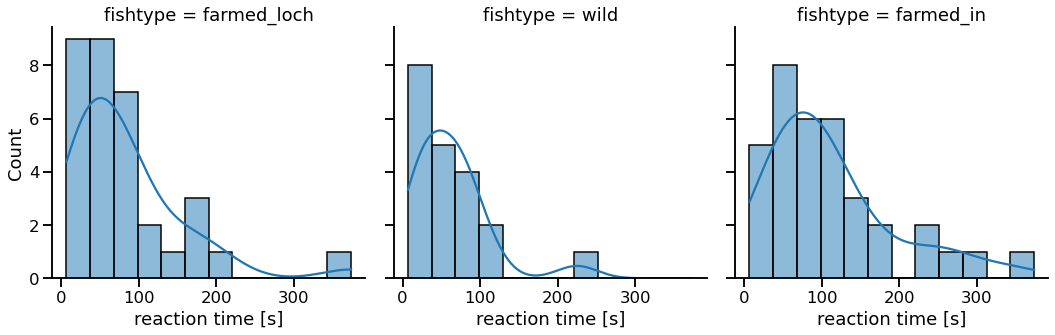

In [85]:
sns.set_context("talk")
g = sns.displot(data=finres, x='tsec', col = 'fishtype', multiple='dodge',kde=True)


#plt.title('Time needed for fish reaction with 5 min cutoff')
#g.xlim(0,500)
for ax in g.axes.flat:
    ax.set_xlabel('reaction time [s]')

plt.show()

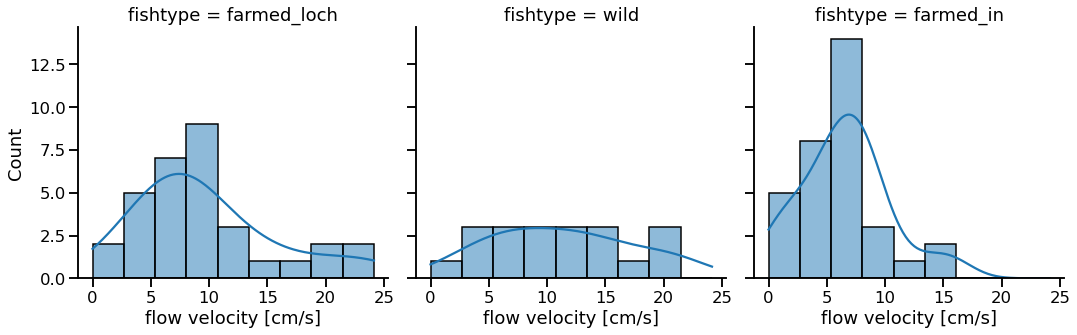

In [87]:
sns.set_context("talk")
g = sns.displot(data=finres, x='abs10', col = 'fishtype', multiple='dodge',kde=True)


#plt.title('Time needed for fish reaction with 5 min cutoff')
#g.xlim(0,500)
for ax in g.axes.flat:
    ax.set_xlabel('flow velocity [cm/s]')

plt.show()

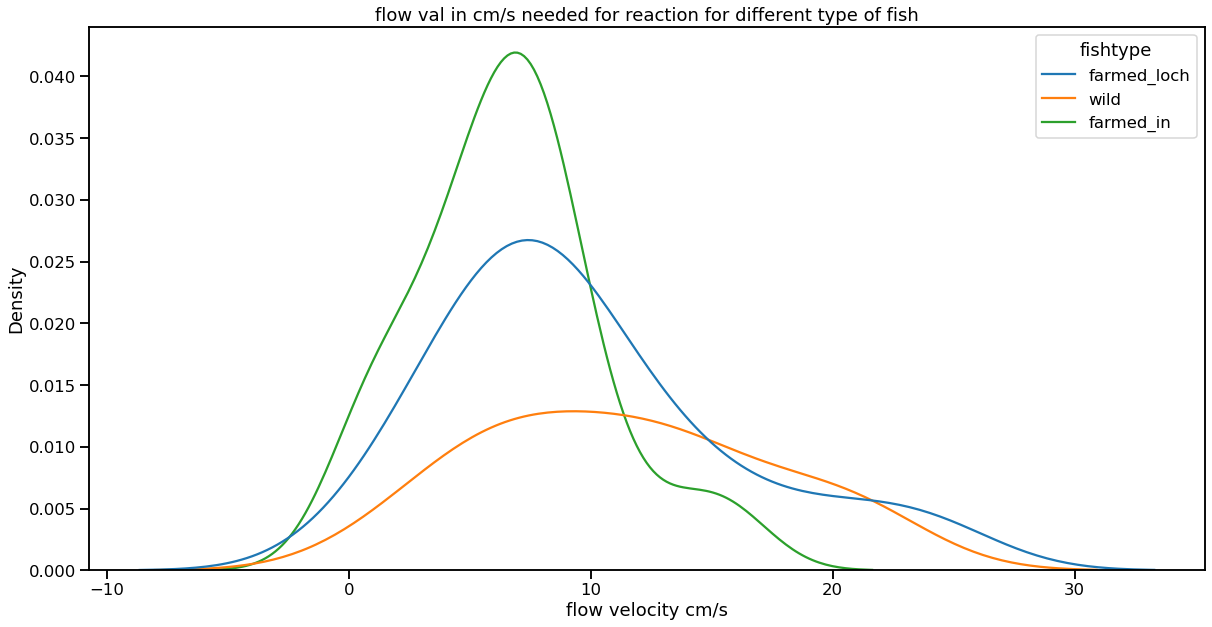

In [60]:
sns.kdeplot(data=finres, x='abs10', hue = 'fishtype', multiple='layer')
plt.title('flow val in cm/s needed for reaction for different type of fish')
plt.xlabel('flow velocity cm/s')
plt.show()

In [33]:

print('Value of flow for turning, mean')
print(finsuc['abs10'].mean())
print(finsuc.groupby(['fishtype']).mean()['abs10'])
print('Value of flow for turning, variance')
print(finsuc['abs10'].var())
print(finsuc.groupby(['fishtype']).var()['abs10'])

print('Value of flow at the point where fish that turned was holding, mean')
print(finsuc['absstable10'].mean())
print(finsuc.groupby(['fishtype']).mean()['absstable10'])
print('Value of flow at the point where the fish that turned was holding, variance')
print(finsuc['absstable10'].var())
print(finsuc.groupby(['fishtype']).var()['absstable10'])

print('Value of time until fish turned, mean')
print(finsuc['tsec'].mean())
print(finsuc.groupby(['fishtype']).mean()['tsec'])
print('Value of time until fish turned, variance')
print(finsuc['tsec'].var())
print(finsuc.groupby(['fishtype']).var()['tsec'])


Value of flow for turning, mean
8.941935483870967
fishtype
farmed_in       7.318182
farmed_loch     8.538000
wild           11.996667
Name: abs10, dtype: float64
Value of flow for turning, variance
28.408704389212055
fishtype
farmed_in      15.941558
farmed_loch    27.481725
wild           38.324452
Name: abs10, dtype: float64
Value of flow at the point where fish that turned was holding, mean
12.692741935483877
fishtype
farmed_in       8.636364
farmed_loch    14.048000
wild           16.383333
Name: absstable10, dtype: float64
Value of flow at the point where the fish that turned was holding, variance
28.56064317821257
fishtype
farmed_in      14.718615
farmed_loch    28.982183
wild            8.951310
Name: absstable10, dtype: float64
Value of time until fish turned, mean
93.08064516129032
fishtype
farmed_in      128.590909
farmed_loch     76.000000
wild            69.466667
Name: tsec, dtype: float64
Value of time until fish turned, variance
5224.632734003173
fishtype
farmed_in      

# Some random stuff, ignore:

In [83]:
#5 second mean value at the turning point
# Is there a difference between value of flow for wild or farmed fish in the same flow conditions?

g1 = finres[(finres['fs']=='high') & (finres['fishtype']=='farmed_loch')]['abs5'].dropna()
g2 = finres[(finres['fs']=='high') & (finres['fishtype']=='wild')]['abs5'].dropna()

print(np.var(g1), np.var(g2))
stats.ttest_ind(a=g1, b=g2, equal_var=True)


39.59333161157025 37.3814


Ttest_indResult(statistic=-0.23428138301560095, pvalue=0.8159615976449247)

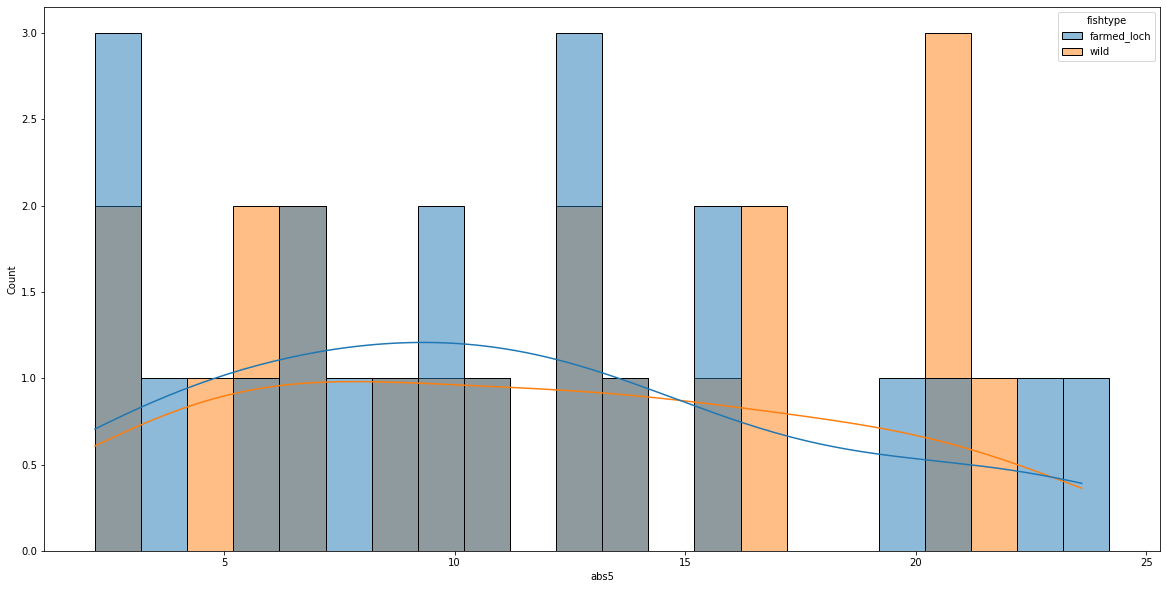

In [84]:
sns.histplot(data=finres[(finres['fs']=='high')], x='abs5', hue = 'fishtype' ,binwidth=1,kde=True)
plt.show()

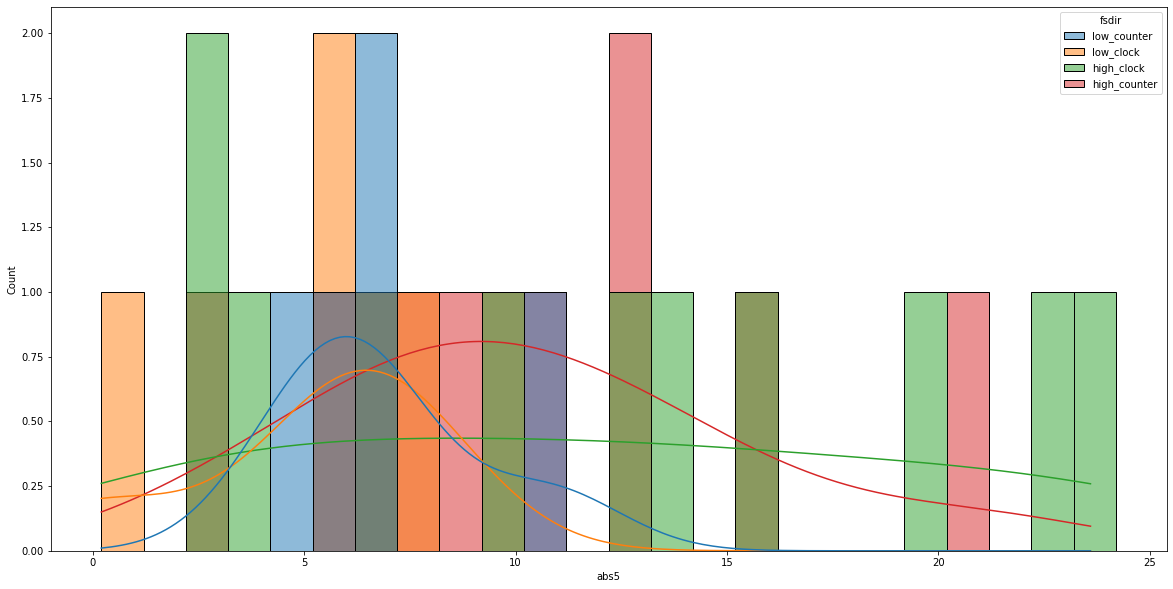

In [85]:
sns.histplot(data=finres[(finres['fishtype']=='farmed_loch')], x='abs5', hue = 'fsdir' ,binwidth=1,kde=True)
plt.show()